
CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比

MEDV：自住房中位数价格，单位是千元

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["ans"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
# 把我們的題目分成 考古題(train) 和 考試題(test)
from sklearn.model_selection import train_test_split
# [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(boston["data"],
                                                    boston["target"],
                                                    test_size=0.1)

In [3]:
# 選擇學習方式
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6)

In [4]:
# 開始做考古題(fit)
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [5]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print("預測的答案:", list(pre))
print("正確的答案:", list(y_test))
print("R2 score:", r2_score(y_test, pre))

預測的答案: [49.472727272727276, 14.75, 16.275, 20.77794117647059, 23.719999999999995, 16.275, 16.275, 38.7, 20.77794117647059, 22.8, 25.21666666666667, 34.58999999999999, 32.012499999999996, 25.21666666666667, 16.275, 16.275, 23.719999999999995, 20.830000000000005, 16.639999999999997, 20.77794117647059, 16.275, 20.77794117647059, 22.8, 27.973333333333333, 50.0, 23.719999999999995, 18.12, 34.58999999999999, 44.93333333333334, 20.830000000000005, 25.685714285714287, 20.830000000000005, 25.21666666666667, 16.275, 32.04, 14.63, 20.77794117647059, 20.77794117647059, 20.77794117647059, 14.75, 14.63, 16.275, 7.0, 17.900000000000002, 16.275, 20.77794117647059, 9.012499999999998, 44.93333333333334, 28.125, 16.275, 16.275]
正確的答案: [48.5, 21.7, 18.1, 21.9, 22.3, 14.9, 16.7, 43.8, 23.2, 50.0, 24.8, 36.2, 36.5, 25.0, 16.6, 15.6, 20.4, 21.7, 19.5, 21.8, 16.4, 17.6, 41.3, 23.7, 50.0, 22.9, 12.0, 32.9, 50.0, 18.8, 22.2, 18.3, 22.0, 13.1, 31.2, 13.5, 17.5, 16.1, 18.2, 11.0, 17.1, 15.6, 17.3, 23.7, 12.7, 23.

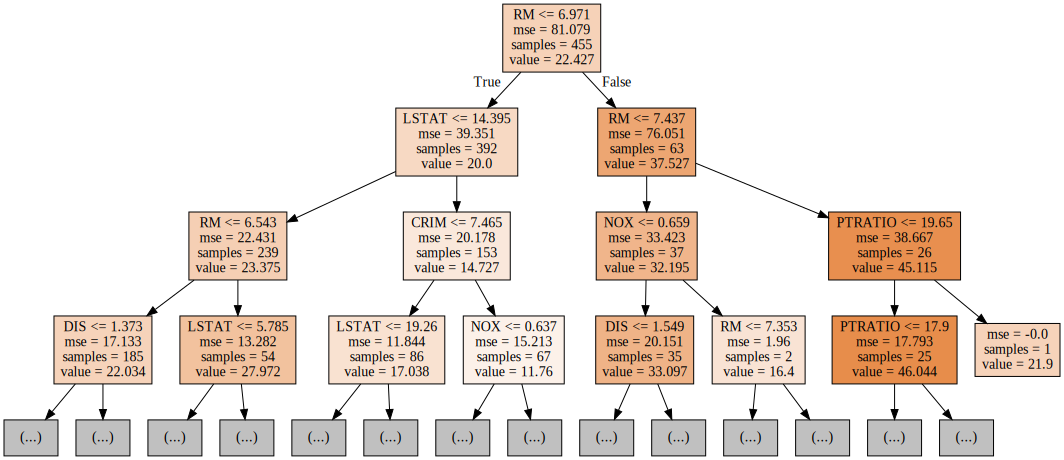

In [8]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg, 
                    feature_names=boston["feature_names"],
                    max_depth=3,
                    filled=True)
graphviz.Source(g)